# Clustering Simulation Study
## DATA 401 - Fall 2017

In [55]:
import pandas as pd
import numpy as np

# Data
from sklearn import datasets

# Clustering Algorithms
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

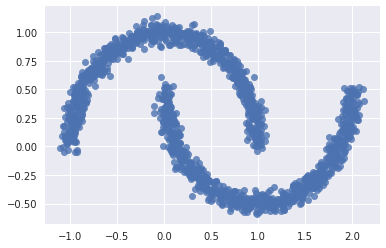

In [25]:
sns.regplot(noisy_moons[0][:,0], noisy_moons[0][:, 1], fit_reg=False)

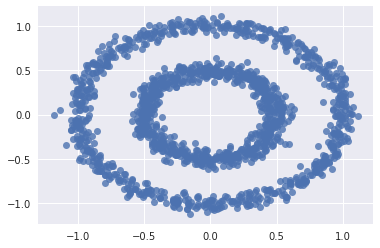

In [26]:
sns.regplot(noisy_circles[0][:,0], noisy_circles[0][:, 1], fit_reg=False)

In [ ]:
clustering_dictionary = {
                         'K-Means': KMeans(n_clusters=4), 
                         'Agglomerative': AgglomerativeClustering(n_clusters=4, linkage="ward"), 
                         'Spectral': SpectralClustering(n_clusters=4),
                         'GaussianMixture': GaussianMixture()
                        }

# Digits Dataset

>Each row of this data frame is a length-784 vector that represents a 28 x 28 image

In [44]:
digits_train = pd.read_csv("/data/digits_train.csv")
digits_test  = pd.read_csv("/data/digits_test.csv")
digits_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


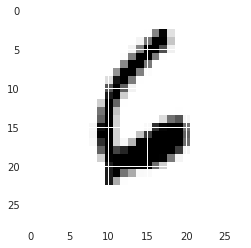

In [43]:
plt.imshow(digits_train.loc[3].values.reshape((28, 28)), cmap="Greys")

In [47]:
digits_test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
len(digits_test)

10000